### Esercizio individuale 21.02.25

# Homework:

1)Given the dataframe attached "df3.csv", which columns contributed to creating the column "f"?

2)Plot the function y = 1/x between -10 and 10 

3)Recreate the three heatmaps.

### 1.

*Importare le librerie e caricamento dataset*

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df3 = pd.read_csv('df3.csv')

print(df3.head())

   Unnamed: 0          a           b          c  d         x           y  z  \
0           0  19.087423  -45.948735  45.727892  0 -1.685862  -44.262872  0   
1           1  20.487493  -35.777837  49.552648  1 -1.506121  -34.271716  0   
2           2  18.690196   -8.861605  48.903702  0  0.052330   -8.913935  0   
3           3  19.429664  124.437220  48.357539  1 -0.640684  125.077904  0   
4           4  20.909506  113.067077  49.989816  0  0.140450  112.926626  0   

   h          g           f  
0  0  47.413754   45.263782  
1  0  51.058770  544.311461  
2  0  48.851372    8.152672  
3  0  48.998223  365.286478  
4  0  49.849366 -112.405410  


In [7]:
print(df3.columns)

Index(['Unnamed: 0', 'a', 'b', 'c', 'd', 'x', 'y', 'z', 'h', 'g', 'f'], dtype='object')


*Indagine in merito a 'f'*

In [8]:
print(df3['f'].describe())

count    10000.000000
mean       241.631775
std        269.395359
min       -368.620901
25%         -9.235237
50%        245.476066
75%        491.500945
max        857.753122
Name: f, dtype: float64


*Matrice di correlazione*

In [9]:
corr_matrix = df3.corr()
print(corr_matrix['f'])

Unnamed: 0   -0.007615
a            -0.006081
b            -0.370958
c             0.019905
d             0.928932
x            -0.002183
y            -0.370916
z                  NaN
h            -0.008912
g             0.030053
f             1.000000
Name: f, dtype: float64


*Visualizzazione matrice di correlazione*

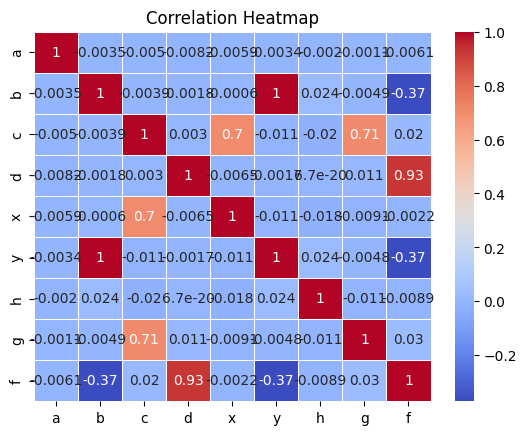

In [12]:
cols = ['a', 'b', 'c', 'd', 'x', 'y', 'h', 'g', 'f']
corr = df3[cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

La colonna "d" ha una forte correlazione positiva (0.928932) con "f". Le colonne "b" (-0.370958) e "y" (-0.370916) mostrano una correlazione negativa moderata con "f". Le colonne "c" (0.019905), "g" (0.030053), "a" (-0.006081), "x" (-0.002183), "h" (-0.008912) e "Unnamed: 0" (-0.007615) hanno valori di correlazione molto vicini allo zero. 

Il principale contributore alla creazione di "f" è "d", data la sua forte correlazione positiva. Inoltre, "b" e "y" potrebbero aver contribuito, ma con un effetto negativo. Le altre colonne probabilmente non hanno un ruolo significativo.

Notiamo infine ulteriori relazioni interessanti tra "b" e "y", "c" e "x", "c" e "g".

### 2.

La funzione non è definita in x=0, il che potrebbe causare problemi nel grafico. Dunque evitiamo la discontinuità per ottenere un plot chiaro.

*Creazione dell'intervallo evitando x = 0*

In [15]:
x = np.linspace(-10, 10, 400)
x = x[x != 0] 

*Calcolare y = 1/x*

In [16]:
y = 1 / x

*Creazione del plot*

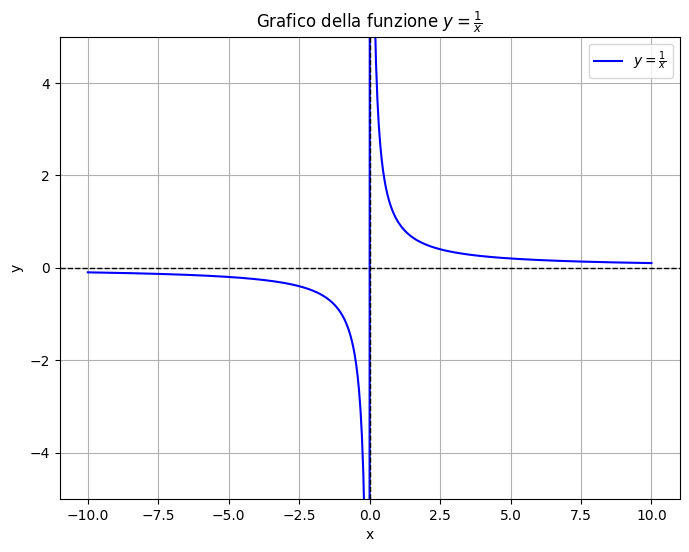

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r"$y = \frac{1}{x}$", color="b")
plt.axhline(0, color='black', linewidth=1, linestyle='--') 
plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.title("Grafico della funzione $y = \\frac{1}{x}$")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-5, 5)
plt.legend()
plt.grid(True)
plt.show()

### 3.

### Heatmap 1

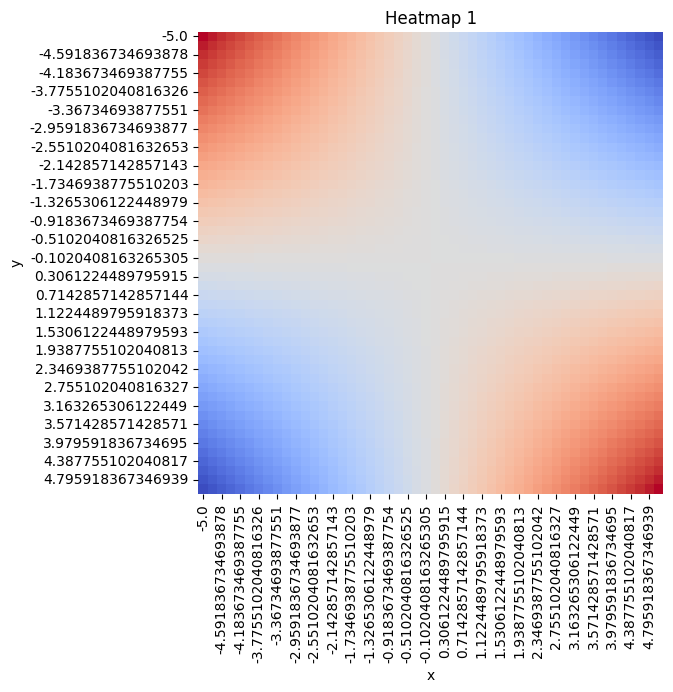

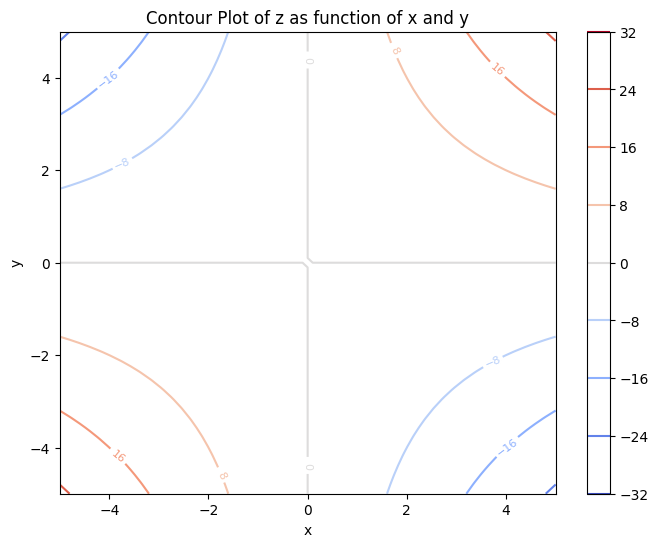

In [34]:
# Creiamo la griglia
x_vals = np.linspace(-5, 5, 50)
y_vals = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x_vals, y_vals)

# Definiamo la funzione
Z = X * Y  

# Convertiamo in DataFrame e pivot per heatmap
df_simulation = pd.DataFrame({'x': X.ravel(), 'y': Y.ravel(), 'z': Z.ravel()})
heatmap_data = df_simulation.pivot(index='y', columns='x', values='z')

# Plot heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, cbar=False)
plt.title('Heatmap 1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Plot contour lines
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, cmap='coolwarm')
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Contour Plot of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

### Heatmap 2

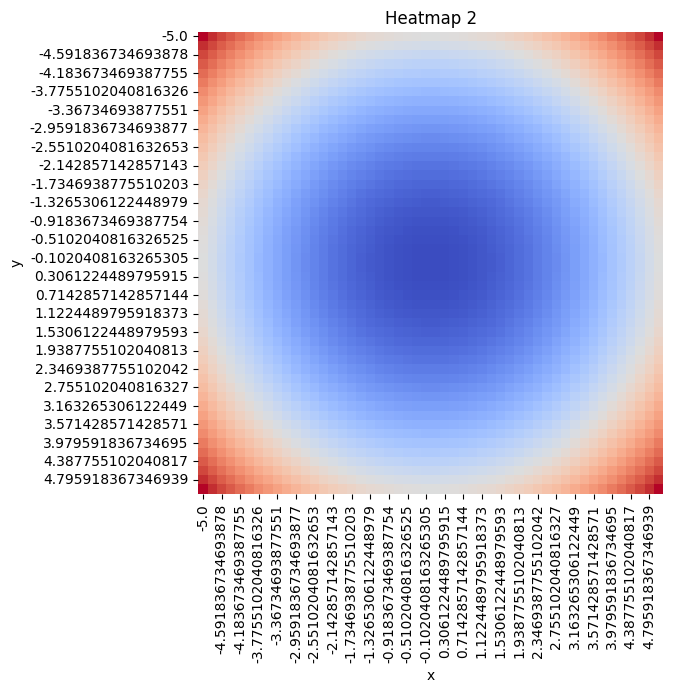

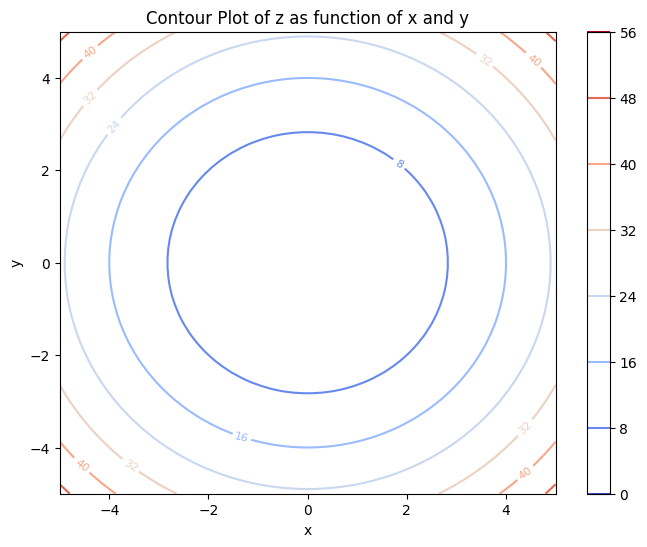

In [35]:
# Creiamo la griglia
x_vals = np.linspace(-5, 5, 50)
y_vals = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x_vals, y_vals)

# Definiamo la funzione
Z = X**2 + Y**2 

# Convertiamo in DataFrame e pivot per heatmap
df_simulation = pd.DataFrame({'x': X.ravel(), 'y': Y.ravel(), 'z': Z.ravel()})
heatmap_data = df_simulation.pivot(index='y', columns='x', values='z')

# Plot heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, cbar=False)
plt.title('Heatmap 2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Plot contour lines
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, cmap='coolwarm')
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Contour Plot of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

### Heatmap 3

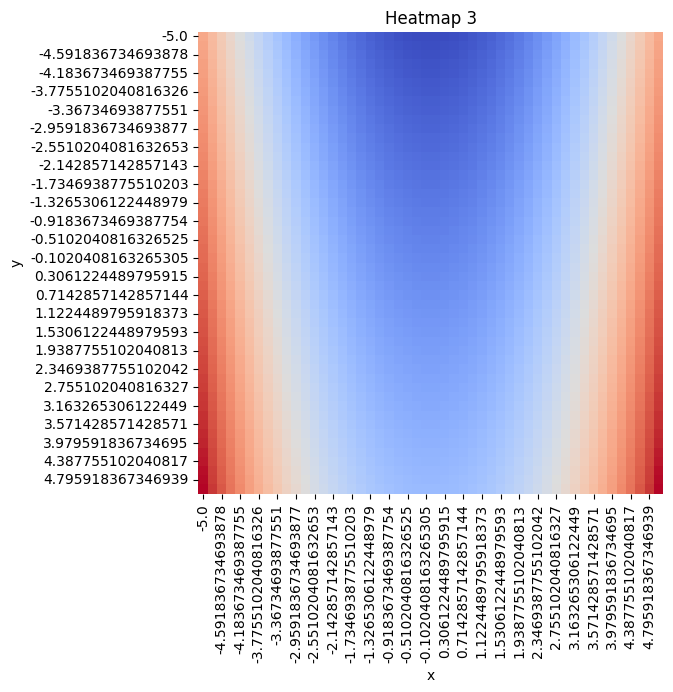

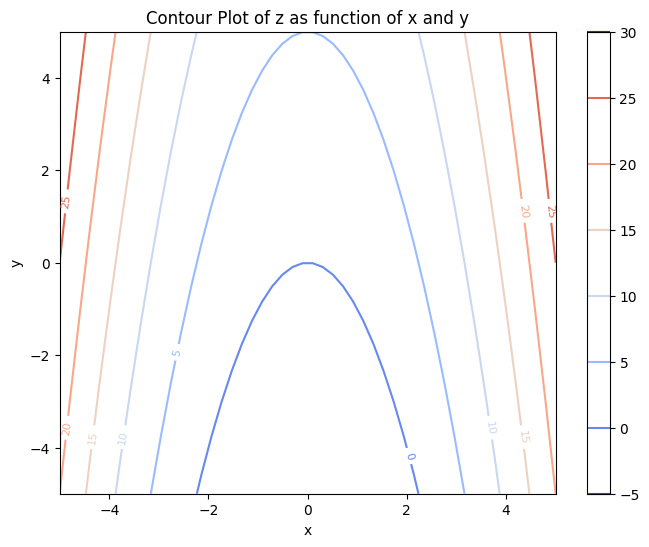

In [36]:
# Creiamo la griglia
x_vals = np.linspace(-5, 5, 50)
y_vals = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x_vals, y_vals)

# Definiamo la funzione
Z = X**2+Y

# Convertiamo in DataFrame e pivot per heatmap
df_simulation = pd.DataFrame({'x': X.ravel(), 'y': Y.ravel(), 'z': Z.ravel()})
heatmap_data = df_simulation.pivot(index='y', columns='x', values='z')

# Plot heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, cbar=False)
plt.title('Heatmap 3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Plot contour lines
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, cmap='coolwarm')
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Contour Plot of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()